In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

phi_0 = np.loadtxt('average_scalar_0.txt')

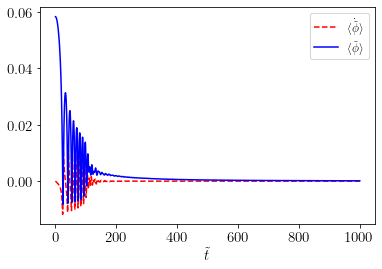

In [2]:
plt.plot(phi_0[:,0],phi_0[:,2], '--', label=r'$\langle \dot{\tilde{\phi}} \rangle$', c='red')
plt.plot(phi_0[:,0],phi_0[:,1], label=r'$\langle \tilde{\phi} \rangle$', c='blue')

#plt.yscale('log')
plt.xlabel(r'$\tilde{t}$', fontsize=15)
plt.legend(fontsize=12)
#plt.savefig('fields.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
E = np.loadtxt('average_energies.txt')

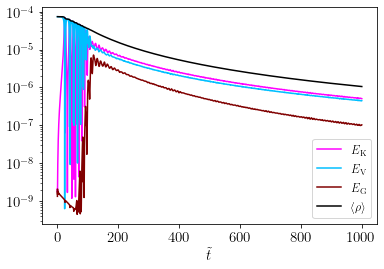

In [4]:
plt.plot(E[:,0], E[:,1], label=r'$E_{\rm{K}}$',c='magenta')
plt.plot(E[:,0], E[:,3], label=r'$E_{\rm{V}}$',c='deepskyblue')
plt.plot(E[:,0], E[:,2], label=r'$E_{\rm{G}}$',c='maroon')
plt.plot(E[:,0], E[:,4], label=r'$\langle \rho \rangle$',c='black')
plt.yscale('log')
plt.xlabel(r'$\tilde{t}$', fontsize=15)
plt.legend(fontsize=12)
#plt.savefig('energies.jpeg', dpi=300, bbox_inches='tight')
plt.show()

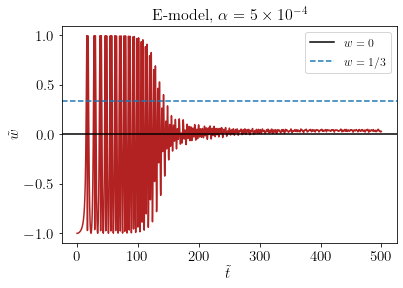

In [5]:
# p = -2a''/a - rho/3
sf = np.loadtxt('average_scale_factor.txt')

time = sf[:,0]
scale = sf[:,1]
scaleDeriv = sf[:,2]

from numpy import gradient

scaleDeriv2 = np.gradient(scaleDeriv, time)
p = -2*(scaleDeriv2/scale) - E[:,4]/3
w = p/E[:,4]

plt.plot(time, w, color='firebrick')
plt.axhline(0,c='k', label=r'$w=0$')
plt.axhline(1./3, linestyle='--', label=r'$w=1/3$')
plt.xlabel(r'$\tilde{t}$', fontsize=15)
plt.ylabel(r'$\tilde{w}$', fontsize=15)
plt.title(r'E-model, $\alpha=5\times10^{-4}$',fontsize=16)
plt.legend(fontsize=12)
#plt.savefig('EoS.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
spectra0 = np.loadtxt('spectra_scalar_0.txt')
size = int(spectra0.shape[0]/221)
spectra0 = np.split(spectra0, size)


cmap = plt.get_cmap('Reds', size) 

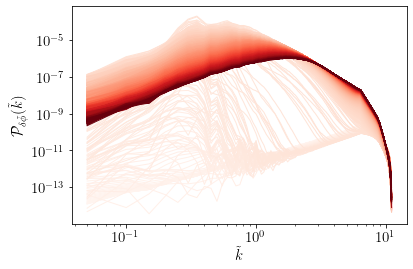

In [8]:
for i in range(size):
    plt.plot(spectra0[i][:,0], spectra0[i][:,1], c=cmap(i), linewidth=1)
    
plt.xlabel(r'$\tilde{k}$', fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\delta\tilde{\phi}}(\tilde{k})$', fontsize=15)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1.0*10**-32,1.0*10*0)
#plt.savefig('spectra0.jpeg', dpi=300, bbox_inches='tight')
plt.show()

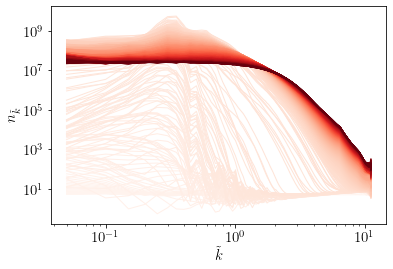

In [9]:
for i in range(size):
    plt.plot(spectra0[i][:,0], spectra0[i][:,3], c=cmap(i), linewidth=1)
    
plt.xlabel(r'$\tilde{k}$', fontsize=15)
plt.ylabel(r'$n_{\tilde{k}}$', fontsize=15)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('particle_number.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
import h5py

'''
Read the HDF5 files where the kinetic and potential energy snapshots are stored.
The snapshots are stored at t = 0, 10, 20, 30 and 40
'''
EK_snapshot = h5py.File('kinetic_energy_snapshot_scalar.h5','r')
EG_snapshot = h5py.File('gradient_energy_snapshot_scalar.h5','r')
EV_snapshot = h5py.File('potential_energy_snapshot.h5','r')

In [11]:
EK_snapshot['E_S_K_0'].keys()

<KeysViewHDF5 ['0.', '100.', '150.', '200.', '250.', '300.', '350.', '400.0000000001', '450.0000000001', '50.', '500.0000000001', '550.', '600.', '650.', '699.9999999999', '749.9999999999', '799.9999999998', '849.9999999998', '899.9999999997', '949.9999999997']>

In [12]:
# Accessing the kinetic and potential energies at t = 90
# We ignore the gradient energy

EK = np.array(EK_snapshot['E_S_K_0']['949.9999999997'])
EG = np.array(EG_snapshot['E_S_G_0']['949.9999999997'])
EV = np.array(EV_snapshot['E_V']['949.9999999997'])

rho_ave = E[:,4][9500] # average energy density at t = 90
rho = EK + EG + EV 
del_rho = (rho - rho_ave)/rho_ave # density contrast at t = 90

In [13]:
del_rho

RHO = rho/rho_ave

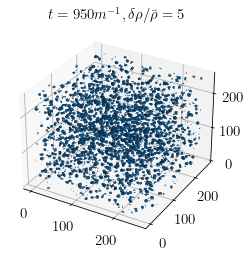

In [16]:
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D


x, y, z = np.mgrid[0:256, 0:256, 0:256]
iso_val = 5
verts, faces, _, _ = measure.marching_cubes(del_rho, iso_val, spacing=(1, 1, 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)
#ax.set_title(r'$t=950m^{-1},\delta\rho/\bar{\rho}=5$', fontsize=15)
#plt.savefig('energy_isosurface_t950_rho_equals_5.jpeg', dpi=300, bbox_inches='tight')
plt.show()

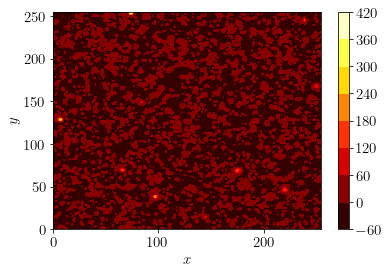

In [17]:
from matplotlib import cm

del_rho_slice_1 = del_rho[0]
del_rho_slice_2 = del_rho[10]

X, Y = np.meshgrid(np.linspace(0,255,256),np.linspace(0,255,256))

plt.contourf(X, Y, del_rho_slice_1, cmap=cm.hot)
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.colorbar()
#plt.savefig('energy_2d_slice1_t950.jpeg', dpi=300, bbox_inches='tight')
plt.show()

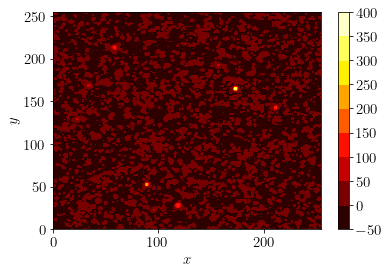

In [18]:
X, Y = np.meshgrid(np.linspace(0,255,256),np.linspace(0,255,256))

plt.contourf(X, Y, del_rho_slice_2, cmap=cm.hot)
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.colorbar()
#plt.savefig('energy_2d_slice2_t950.jpeg', dpi=300, bbox_inches='tight')
plt.show()